In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [11]:
data = pd.read_csv('iso_gaia_clipped.csv', header = 0)
data

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,...,Y,Xc,Xn,Xo,Cexcess,Z,mbolmag,Gmag,G_BPmag,G_RPmag
0,0.0152,0.01508,6.60000,0.090000,1.081690,0.090,-1.674,3.4146,3.676,0,...,0.2755,0.002746,0.000741,0.006719,-1.0,0.01527,8.954,10.894,13.492,9.563
1,0.0152,0.01508,6.60000,0.090446,1.085948,0.090,-1.672,3.4147,3.677,0,...,0.2755,0.002746,0.000741,0.006719,-1.0,0.01527,8.950,10.889,13.488,9.558
2,0.0152,0.01508,6.60000,0.104545,1.207988,0.105,-1.617,3.4202,3.707,0,...,0.2755,0.002746,0.000741,0.006719,-1.0,0.01527,8.812,10.715,13.274,9.389
3,0.0152,0.01508,6.60000,0.112700,1.269209,0.113,-1.583,3.4236,3.719,0,...,0.2755,0.002746,0.000741,0.006719,-1.0,0.01527,8.727,10.585,13.090,9.266
4,0.0152,0.01508,6.60000,0.120294,1.321247,0.120,-1.566,3.4252,3.737,0,...,0.2755,0.002746,0.000741,0.006719,-1.0,0.01527,8.685,10.522,13.003,9.206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14390,0.0152,0.01508,10.10001,0.974058,2.467318,0.695,3.243,3.4957,-0.028,7,...,0.2889,0.002274,0.001136,0.006609,-1.0,0.01639,-3.337,-0.958,1.906,-2.297
14391,0.0152,0.01508,10.10001,0.974058,2.467318,0.691,3.283,3.4895,-0.095,7,...,0.2889,0.002274,0.001136,0.006609,-1.0,0.01639,-3.438,-0.886,2.112,-2.237
14392,0.0152,0.01508,10.10001,0.974058,2.467319,0.685,3.324,3.4831,-0.165,7,...,0.2889,0.002274,0.001136,0.006609,-1.0,0.01639,-3.539,-0.863,2.188,-2.219
14393,0.0152,0.01508,10.10001,0.974059,2.467319,0.675,3.362,3.4772,-0.234,7,...,0.2889,0.002274,0.001136,0.006609,-1.0,0.01639,-3.636,-0.849,2.251,-2.210


360


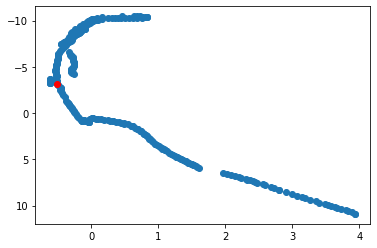

In [17]:
dados = data[data['logAge']==6.6] ##problematicos 6.6, 6.7, 8.8, 8.9
cor = dados['G_BPmag']-dados['G_RPmag']
mag = np.array(dados['Gmag'])
cor = np.array(cor)

#valor = int(len(dados)/4)
valor = 20
oi = sorted(cor)[0:valor]
b = np.mean(oi)
for i in range(len(cor)):
    if cor[i] > b:
        continue
    else:
        local_minimo = i
        break
print(local_minimo)
local_minimo = 160
plt.scatter(cor,mag)
plt.scatter(cor[local_minimo],mag[local_minimo], color = 'red')
plt.gca().invert_yaxis() 

In [4]:
age = np.unique(data['logAge'])
age

array([ 6.6    ,  6.7    ,  6.8    ,  6.9    ,  7.     ,  7.1    ,
        7.2    ,  7.3    ,  7.4    ,  7.5    ,  7.6    ,  7.7    ,
        7.8    ,  7.9    ,  8.     ,  8.1    ,  8.2    ,  8.3    ,
        8.4    ,  8.5    ,  8.6    ,  8.7    ,  8.8    ,  8.9    ,
        9.     ,  9.1    ,  9.2    ,  9.3    ,  9.4    ,  9.5    ,
        9.6    ,  9.7    ,  9.8    ,  9.90001, 10.00001, 10.10001])

In [5]:
Mvarray = []
Bvarray = []
for element in age:
    a = data[data['logAge']==element]
    b = a['Gmag'].tolist()
    c = (a['G_BPmag'] - a['G_RPmag']).tolist()
    Mvarray.append(b)
    Bvarray.append(c)

In [19]:
f = open("Regressoes_Isocronas_Gaia.txt", "w")
f.write("Age,Slope,Intercept,Slope_Error,Intercept_Error,R_Value,(BP-RP)TurnOff,GmagTurnOff,Ajustadas/Total\n")
for i in range(len(age)):
    cor = Bvarray[i]
    cor = np.asarray(cor)
    mag = Mvarray[i]
    mag = np.asarray(mag)
    valor = 20
    crescente = sorted(cor)[0:valor]
    media = np.mean(crescente)
    for j in range(len(cor)):
        if cor[j] > media:
            continue
        else:
            local_minimo_cor = j
            break
    #local_minimo_cor = np.where(cor==np.min(cor))[0][0]
    problematicas = [6.6,6.7]
    if age[i] in problematicas:
        local_minimo_cor = 160
    cor_turnoff = cor[local_minimo_cor]
    mag_turnoff = mag[local_minimo_cor]

    cor_mainseq = cor[0:local_minimo_cor]
    mag_mainseq = mag[0:local_minimo_cor]
    first_regress = stats.linregress(cor_mainseq,mag_mainseq)
    cor_mainseq = np.asarray(cor_mainseq)
    mag_mainseq = np.asarray(mag_mainseq)
    t_fit = np.linspace(cor_mainseq.min(),cor_mainseq.max(), len(cor_mainseq))
    sigmay = np.sqrt((t_fit*first_regress.stderr)**2 + (first_regress.intercept_stderr)**2)
    
    cor_clippada = []
    mag_clippada = []
    count = 0
    ytentativa = first_regress.slope*cor_mainseq + first_regress.intercept
    for element in mag_mainseq:
        if ytentativa[count] + sigmay[count] >= element and ytentativa[count] - sigmay[count] <= element:
            cor_clippada.append(cor_mainseq[count])
            mag_clippada.append(mag_mainseq[count])
        count+=1
    cor_clippada = np.asarray(cor_clippada)
    mag_clippada = np.asarray(mag_clippada)
    
    razao = str(len(cor_clippada)/len(cor_mainseq)) + '= ' + str(len(cor_clippada)) + '/' + str(len(cor_mainseq))
    #Nova regressao para as estrelas que sao pertencentes ao intervalo sigma#
    
    final_regression = stats.linregress(cor_clippada,mag_clippada)
    f.write(str(age[i]) + ', ' + str(final_regression.slope) + ', ' +  str(final_regression.intercept) + ', ' + str(final_regression.stderr) + ', ' + 
            str(final_regression.intercept_stderr) +  ', ' + str(final_regression.rvalue) + ', '+ str(cor_turnoff) + ', ' + str(mag_turnoff) + ', ' + razao + '\n')
f.close()